In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
figures = {}

In [3]:
histories_df = pd.read_csv(os.path.join("..","cifar10-results","histories_df.csv"))
evaluation_df = pd.read_csv(os.path.join("..","cifar10-results","evaluation.csv"))
durations_df = pd.read_csv(os.path.join("..","cifar10-results","durations.csv"))

In [4]:
durations_df.columns = ["model","duration"]

In [5]:
durations_df

,model,duration
0,Mini-Batch SGD,102.652152
1,Mini-Batch SGD + Early Stopping,57.742547
2,Mini-Batch SGD With L2 Nomralization,100.922874
3,Mini-Batch SGD With Dropout Rate = 0.2,105.407015
4,Mini-Batch SGD With Dropout Rate = 0.3,105.240382
5,Mini-Batch SGD With Dropout Rate = 0.5,106.039060
6,Mini-Batch SGD With Batch Normalization,107.224656
7,Random Search,187.643153


/tmp/ipykernel_28481/3317316380.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


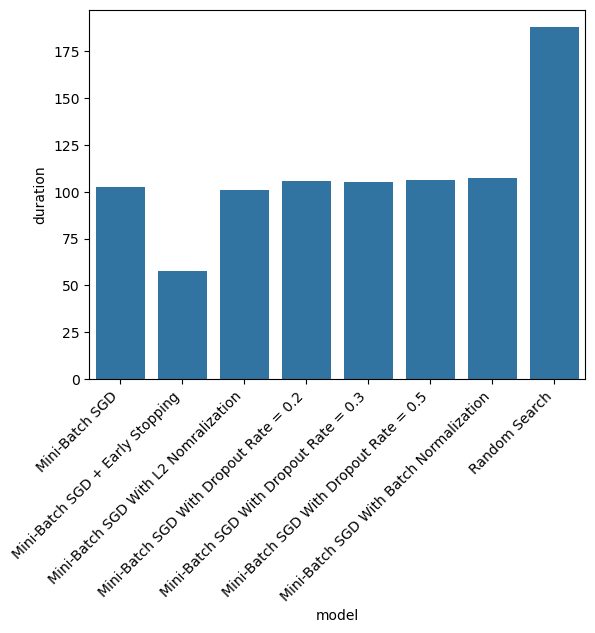

In [6]:
ax = sns.barplot(x=durations_df["model"],y=durations_df["duration"])
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

In [7]:
evaluation_df.index = durations_df["model"]

In [8]:
evaluation_df

,loss,accuracy
model,,
Mini-Batch SGD,1.506944,0.4957
Mini-Batch SGD + Early Stopping,1.466845,0.4882
Mini-Batch SGD With L2 Nomralization,1.528138,0.4837
Mini-Batch SGD With Dropout Rate = 0.2,1.495598,0.4828
Mini-Batch SGD With Dropout Rate = 0.3,1.455339,0.4884
Mini-Batch SGD With Dropout Rate = 0.5,1.491055,0.4762
Mini-Batch SGD With Batch Normalization,1.740329,0.4395
Random Search,1.460039,0.4928


/tmp/ipykernel_28481/461668839.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


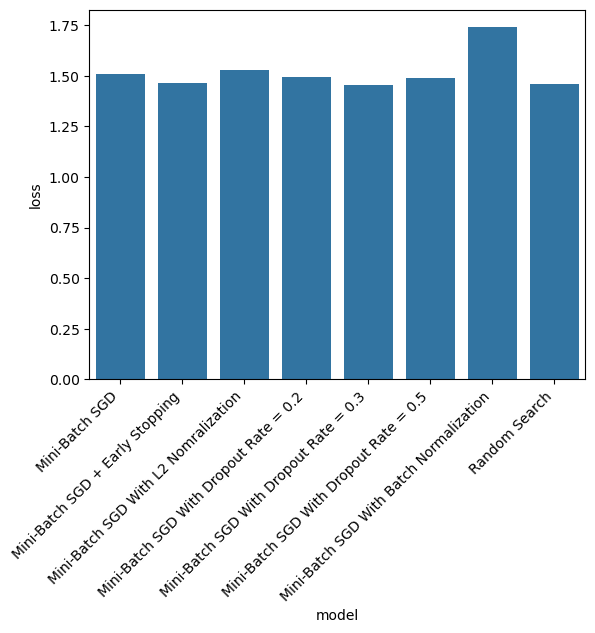

In [9]:
ax = sns.barplot(x=evaluation_df.index,y=evaluation_df["loss"])
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

/tmp/ipykernel_28481/755417911.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')


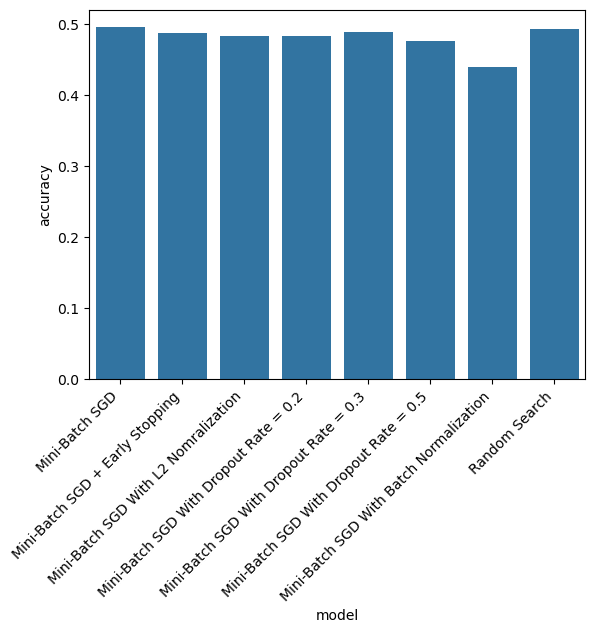

In [10]:
ax = sns.barplot(x=evaluation_df.index,y=evaluation_df["accuracy"])
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha='right')

In [11]:
histories_df.head()

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy,model
0,1.960417,0.289233,1.844291,0.3443,Mini-Batch SGD
1,1.784453,0.365633,1.746886,0.3765,Mini-Batch SGD
2,1.710305,0.393600,1.716083,0.3887,Mini-Batch SGD
3,1.655827,0.413100,1.709922,0.3818,Mini-Batch SGD
4,1.617796,0.428000,1.685000,0.3987,Mini-Batch SGD


In [12]:
def plot_learning_graph_in_same_axis(
    histories_df,
    metric,
    split
):
    models = histories_df["model"].value_counts().index

    ax = None

    for model in models:
        
        mask = histories_df["model"] == model
        metric_name = metric if split == "train" else "val_"+metric
        y = histories_df[metric_name][mask]
        x = list(range(y.shape[0]))
        
        ax = sns.lineplot(x=x,y=y,ax=ax,label=model)

    plt.legend()

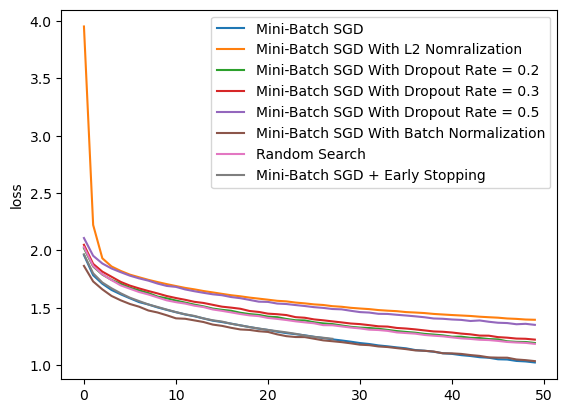

In [13]:
plot_learning_graph_in_same_axis(histories_df, "loss", "train")

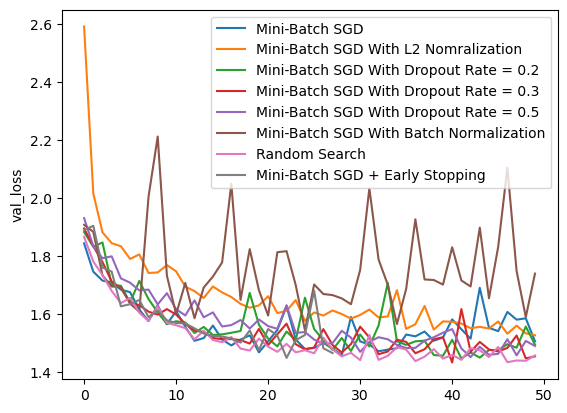

In [15]:
plot_learning_graph_in_same_axis(histories_df, "loss", "val")

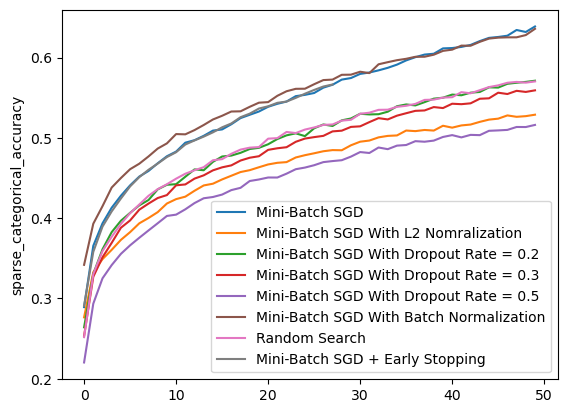

In [17]:
plot_learning_graph_in_same_axis(histories_df, "sparse_categorical_accuracy", "train")

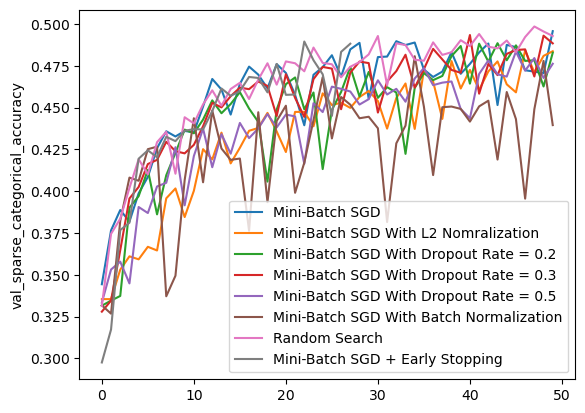

In [19]:
plot_learning_graph_in_same_axis(histories_df, "sparse_categorical_accuracy", "val")

In [21]:
def plot_overfitting_graphs(histories_df):

    models = histories_df["model"].value_counts().index

    for model in models:
        
        fig,(ax1, ax2) = plt.subplots(nrows=2)

        df = histories_df[histories_df["model"] == model]

        x = list(range(len(df)))

        sns.lineplot(x=x,y=df["loss"],ax=ax1)
        sns.lineplot(x=x,y=df["val_loss"],ax=ax1)

        ax1.set_title(f"Loss graph Train Vs Validation set for model : {model}")

        sns.lineplot(x=x,y=df["sparse_categorical_accuracy"],ax=ax2)
        sns.lineplot(x=x,y=df["val_sparse_categorical_accuracy"],ax=ax2)

        ax2.set_title(f"accuracy graph Train Vs Validation set for model : {model}")

        plt.tight_layout()
        plt.show()

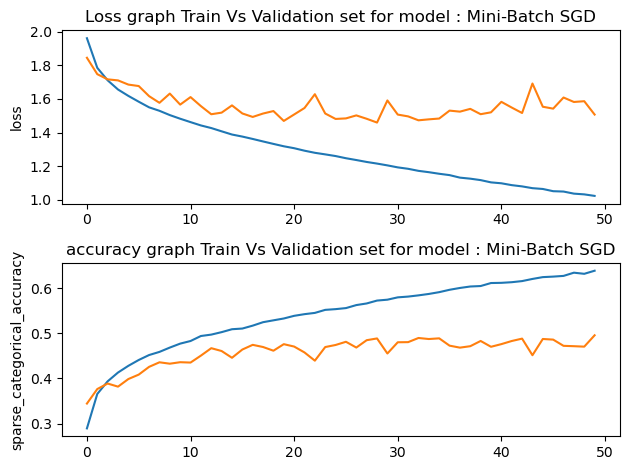

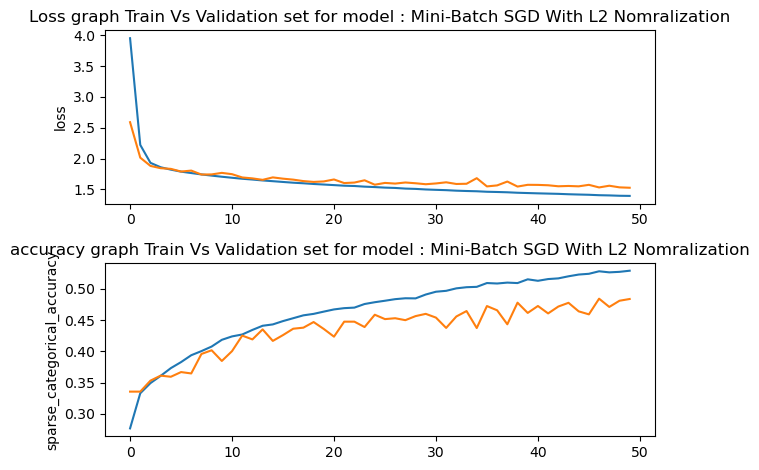

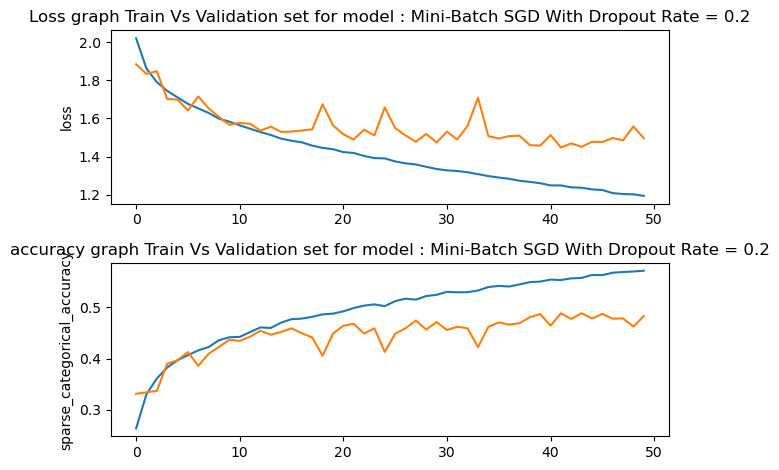

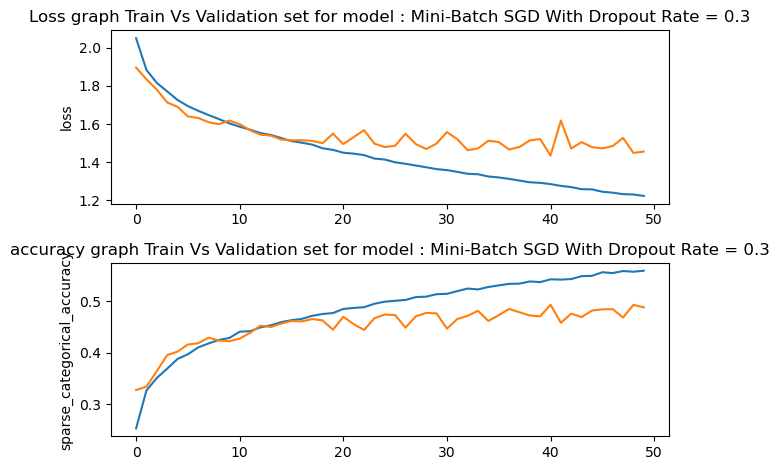

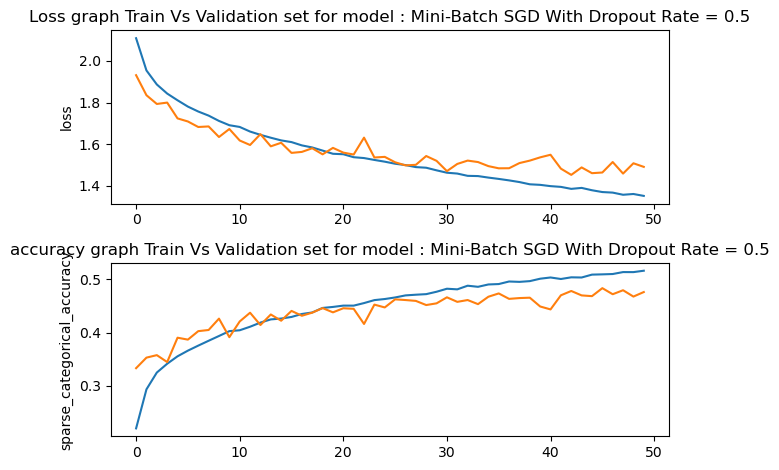

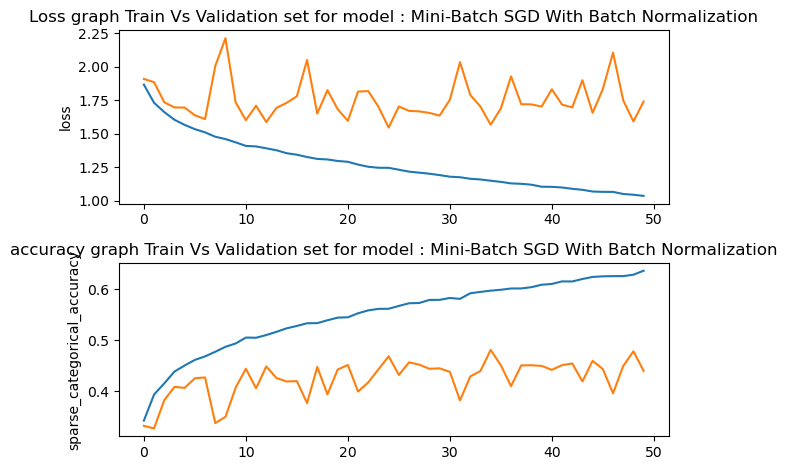

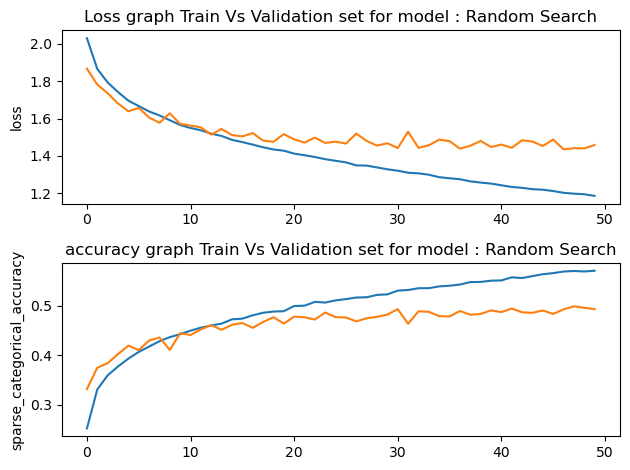

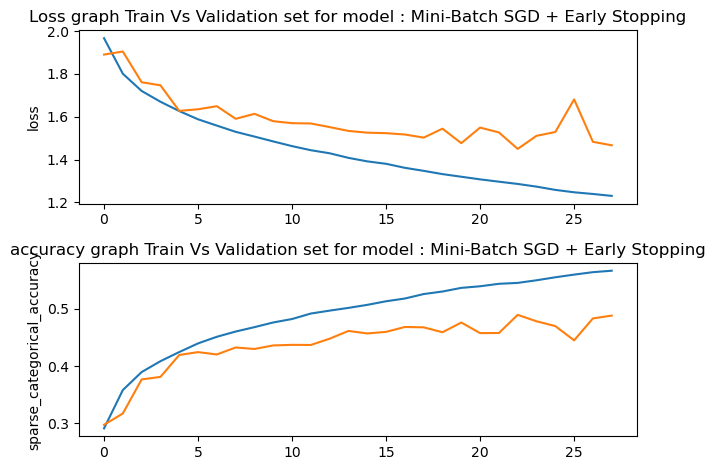

In [22]:
plot_overfitting_graphs(histories_df)